
Popular Data Science Questions

Our goal in this project is to use [Data Science Stack Exchange](https://datascience.stackexchange.com/) to determine what content should a data science education company create, based on interest by subject.
Stack Exchange
What kind of questions are welcome on this site?

On DSSE's help center's section on questions , we can read that we should:

    Avoid subjective questions.
    Ask practical questions about Data Science — there are adequate sites for theoretical questions.
    Ask specific questions.
    Make questions relevant to others.

All of these characteristics, if employed, should be helpful attributes to our goal.

In the help center we also learned that in addition to the sites mentioned in the Learn section, there are other two sites that are relevant:

    Open Data (Dataset requests)
    Computational Science (Software packages and algorithms in applied mathematics)

What, other than questions, does DSSE's home subdivide into?

On the home page we can see that we have four sections:

    Questions — a list of all questions asked;

    Tags — a list of tags (keywords or labels that categorize questions);

    tags_ds
    Users — a list of users;
    Unanswered — a list of unanswered questions;

The tagging system used by Stack Exchange looks just like what we need to solve this problem as it allow us to quantify how many questions are asked about each subject.

Something else we can learn from exploring the help center, is that Stack Exchange's sites are heavily moderated by the community; this gives us some confidence in using the tagging system to derive conclusions.
What information is available in each post?

Looking, just as an example, at this question, some of the information we see is:

    For both questions and answers:
        The posts's score;
        The posts's title;
        The posts's author;
        The posts's body;
    For questions only:
        How many users have it on their "
        The last time the question as active;
        How many times the question was viewed;
        Related questions;
        The question's tags;

Stack Exchange Data Explorer

Perusing the table names, a few stand out as relevant for our goal:

    Posts
    PostTags
    Tags
    TagSynonyms



In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
data = pd.read_csv('2019_questions.csv')
print(data.shape)
data.info()

(8839, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             8839 non-null   int64  
 1   CreationDate   8839 non-null   object 
 2   Score          8839 non-null   int64  
 3   ViewCount      8839 non-null   int64  
 4   Tags           8839 non-null   object 
 5   AnswerCount    8839 non-null   int64  
 6   FavoriteCount  1407 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB




We see that only FavoriteCount has missing values. A missing value on this column probably means that the question was is not present in any users' favorite list, so we can replace the missing values with zero.

The types seem adequate for every column, however, after we fill in the missing values on FavoriteCount, there is no reason to store the values as floats.

Since the object dtype is a catch-all type, let's see what types the objects in questions["Tags"] are.


In [3]:
#Type of tag
data["Tags"].apply(lambda value: type(value)).unique()


array([<class 'str'>], dtype=object)

## Cleaning the data 

In [4]:
data['FavoriteCount'].fillna(0,inplace= True )
data['FavoriteCount'] = data['FavoriteCount'].astype(int)

In [5]:
data.dtypes

Id                int64
CreationDate     object
Score             int64
ViewCount         int64
Tags             object
AnswerCount       int64
FavoriteCount     int32
dtype: object

In [6]:
data["Tags"]= data["Tags"].str.replace('^<|>$','').str.split('><')

In [7]:
data["Tags"].head()

0                      [machine-learning, data-mining]
1    [machine-learning, regression, linear-regressi...
2         [python, time-series, forecast, forecasting]
3                [machine-learning, scikit-learn, pca]
4             [dataset, bigdata, data, speech-to-text]
Name: Tags, dtype: object

In [8]:
data

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,0
3,44427,2019-01-23 10:57:09,0,55,"[machine-learning, scikit-learn, pca]",1,0
4,44428,2019-01-23 11:02:15,0,19,"[dataset, bigdata, data, speech-to-text]",0,0
...,...,...,...,...,...,...,...
8834,55413,2019-07-10 09:08:31,1,39,"[pca, dimensionality-reduction, linear-algebra]",1,1
8835,55414,2019-07-10 09:34:55,0,113,"[keras, weight-initialization]",0,0
8836,55415,2019-07-10 09:45:37,1,212,"[python, visualization, seaborn]",1,0
8837,55416,2019-07-10 09:59:56,0,22,[time-series],0,0


In [9]:
tags_count = {}
for tags in data["Tags"]:
    for tag in tags:
        if tag in tags_count:
            tags_count[tag]+=1
        else:
            tags_count[tag]=1
            
#Convert Tags to a datafram
tags_cnt=pd.DataFrame.from_dict(tags_count,orient  ='index' )
tags_cnt.head()
tags_cnt = tags_cnt.rename(columns={0:'Count'})
tags_cnt.head()
                 

,Count
machine-learning,2693
data-mining,217
regression,347
linear-regression,175
regularization,50


Let's now sort this dataframe by Count and visualize the top 20 results.

<AxesSubplot:>

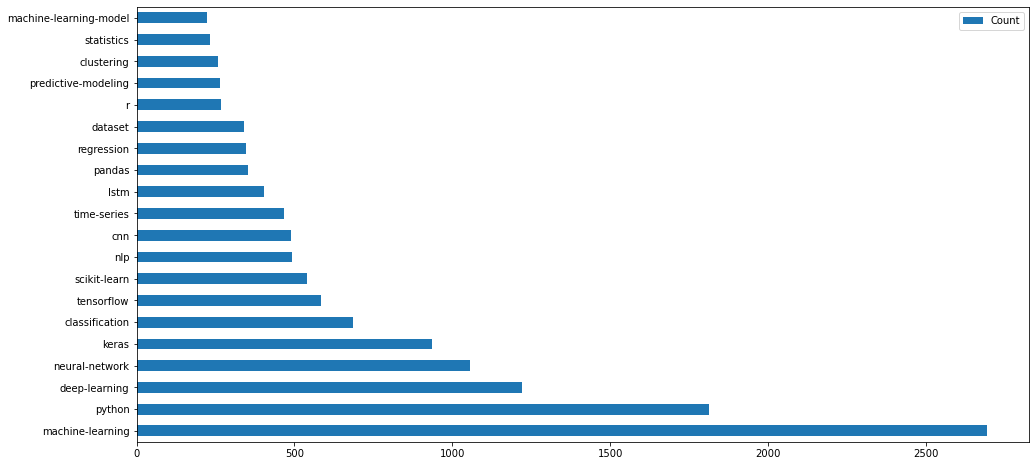

In [10]:
most_used = tags_cnt.sort_values(by='Count',ascending=False).head(20)
most_used.plot.barh(figsize=(16,8))

In [11]:
# Tag view count 
view_count = {}
for index,row in data.iterrows():
    for tag in row['Tags']:
        if tag in view_count:
            view_count[tag]+=row['ViewCount']
        else:
            view_count[tag]=row['ViewCount']
            
#Convert Tags to a datafram
views_cnt=pd.DataFrame.from_dict(view_count,orient  ='index' )

views_cnt = views_cnt.rename(columns={0:'ViewCount'})
views_cnt.head()

,ViewCount
machine-learning,388499
data-mining,31056
regression,49451
linear-regression,18978
regularization,4941


<AxesSubplot:>

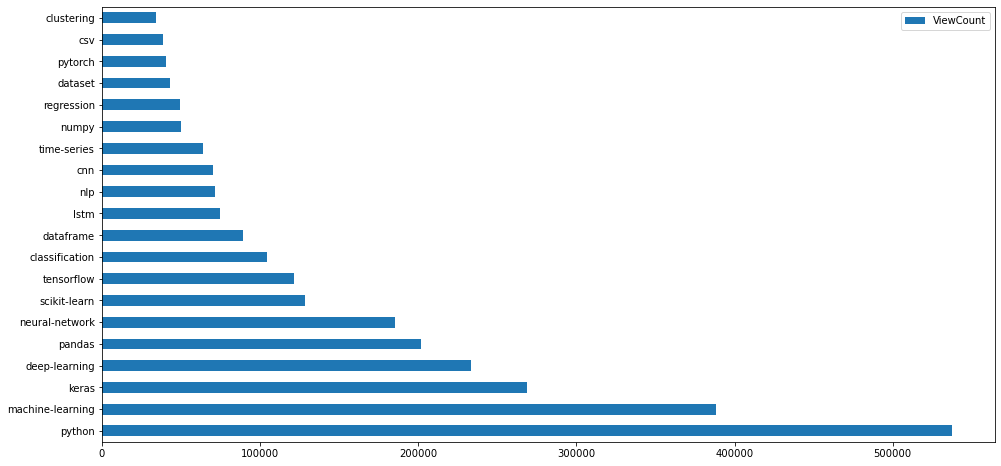

In [12]:
most_viewed = views_cnt.sort_values(by='ViewCount',ascending=False).head(20)
most_viewed.plot.barh(figsize=(16,8))

Plot the above side by side 

array([<AxesSubplot:title={'center':'ViewCount'}>], dtype=object)

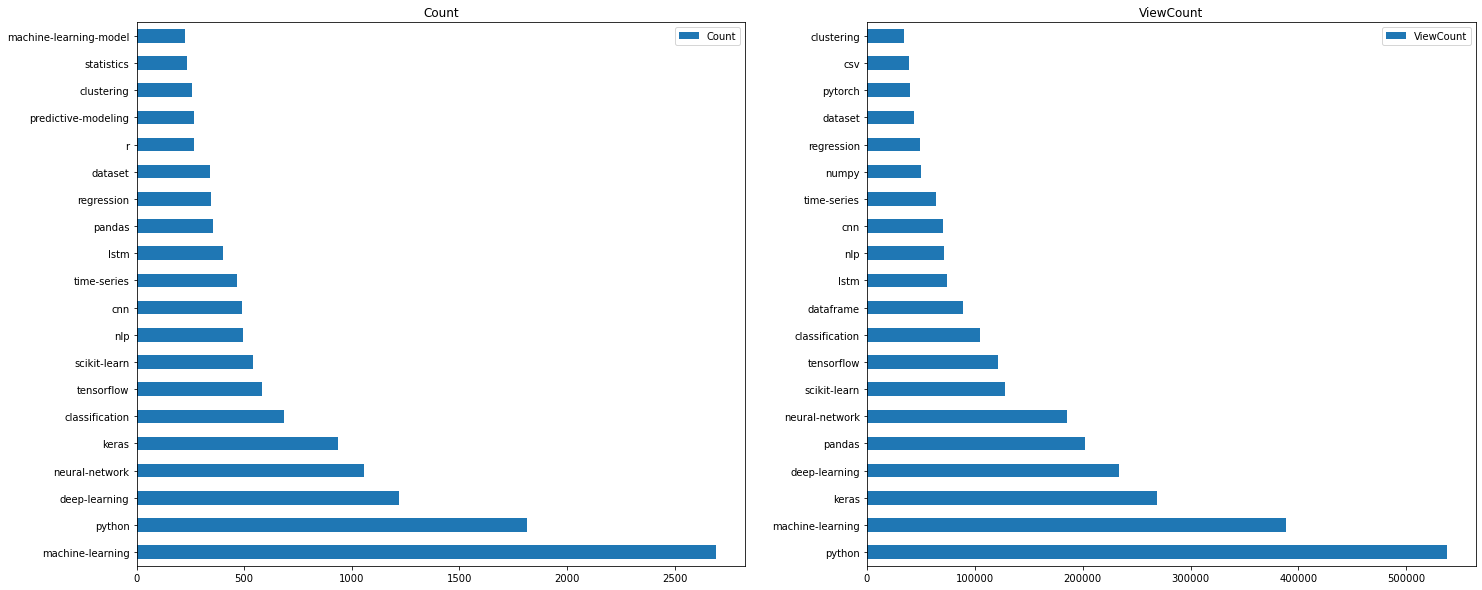

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))
most_used.plot(kind="barh", ax=axes[0], subplots=True)
most_viewed.plot(kind="barh", ax=axes[1], subplots=True)

In [14]:
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
in_viewed = pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)


## Relations Between Tags

One way of trying to gauge how pairs of tags are related to each other, is to count how many times each pair appears together. Let's do this.

We'll begin by creating a list of all tags.


In [15]:
all_tags = list(tags_cnt.index)
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations.iloc[0:4,0:4]


,machine-learning,data-mining,regression,linear-regression
machine-learning,NaN,NaN,NaN,NaN
data-mining,NaN,NaN,NaN,NaN
regression,NaN,NaN,NaN,NaN
linear-regression,NaN,NaN,NaN,NaN


We will now fill this dataframe with zeroes and then, for each lists of tags in questions["Tags"], we will increment the intervening tags by one. The end result will be a dataframe that for each pair of tags, it tells us how many times they were used together.

In [16]:
associations.fillna(0, inplace=True)

for tags in data["Tags"]:
    associations.loc[tags, tags] += 1


This dataframe is quite large. Let's focus our attention on the most used tags.

In [17]:
relations_most_used = associations.loc[most_used.index, most_used.index]

def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc["time-series", "r"] = "background-color: yellow"
    helper_df.loc["r", "time-series"] = "background-color: yellow"
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
    
    return helper_df

relations_most_used.style.apply(style_cells, axis=None)

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,time-series,lstm,pandas,regression,dataset,r,predictive-modeling,clustering,statistics,machine-learning-model
machine-learning,2693,499,429,366,195,259,106,188,113,124,131,71,62,119,99,63,123,61,89,139
python,499,1814,160,137,280,98,167,235,71,62,105,61,244,59,53,24,35,45,35,37
deep-learning,429,160,1220,305,247,59,136,16,72,160,44,103,1,21,32,5,32,2,12,19
neural-network,366,137,305,1055,235,65,108,24,24,118,33,69,1,42,20,9,13,8,11,10
keras,195,280,247,235,935,58,256,34,23,116,51,133,3,31,13,10,11,0,3,17
classification,259,98,59,65,58,685,20,47,35,20,25,20,3,34,28,10,27,12,19,21
tensorflow,106,167,136,108,256,20,584,15,11,57,9,43,3,9,9,1,6,0,0,9
scikit-learn,188,235,16,24,34,47,15,540,12,0,12,2,37,37,9,1,12,24,6,18
nlp,113,71,72,24,23,35,11,12,493,7,0,19,3,2,11,4,1,9,3,4
cnn,124,62,160,118,116,20,57,0,7,489,8,24,1,6,11,2,6,0,1,4




The cells highlighted in yellow tell us that time-series was used together with r 22 times. The values in blue tell us how many times each of the tags was used. We saw earlier that machine-learning was used 2693 times and we confirm it in this dataframe.

It's hard for a human to understand what is going on in this dataframe. Let's create a heatmap. But before we do it, let's get rid of the values in blue, otherwise the colors will be too skewed.


In [21]:
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = np.NaN

<AxesSubplot:>

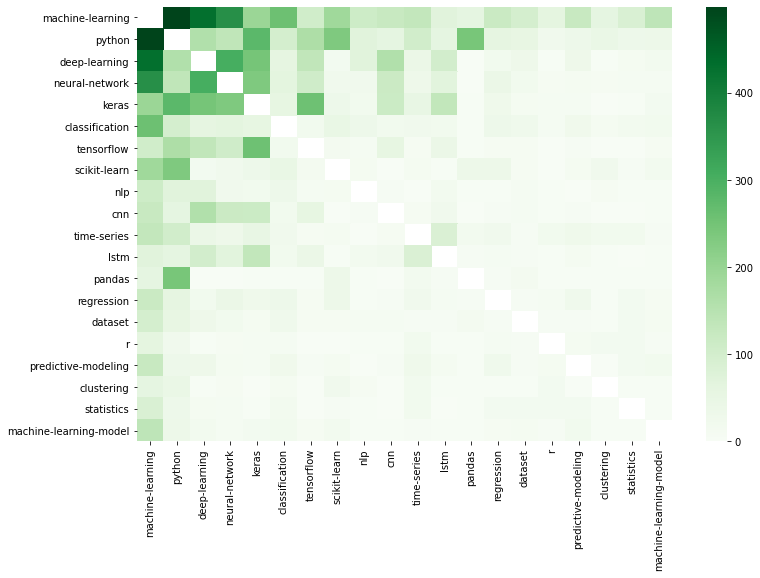

In [23]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Greens", annot=False)



The most used tags also seem to have the strongest relationships, as given by the dark concentration in the bottom right corner. However, this could simply be because each of these tags is used a lot, and so end up being used together a lot without possibly even having any strong relation between them.

A more intuitive manifestation of this phenomenon is the following. A lot of people buy bread, a lot of people buy toilet paper, so they end up being purchased together a lot, but purchasing one of them doesn't increase the chances of purchasing the other.

Another shortcoming of this attempt is that it only looks at relations between pairs of tags and not between multiple groups of tags. For example, it could be the case that when used together, dataset and scikit-learn have a "strong" relation to pandas, but each by itself doesn't.

So how do we attack both these problems? There is a powerful data mining technique that allows us to handle this: association rules. Association rules allow us to analytically spot relations like "people who purchase milk, also purchase eggs". Moreover, we can also measure how strong this relations are on several fronts: how common the relation is, how strong it is, and how independent the components of the relationship are (toilet paper and bread are probably more independent than eggs and milk — you'll learn more about statistical independence) in the next step).

We won't get into the details of it, as the technique is out of scope for this course, but it is a path worth investigating!



## Enter Domain Knowledge

Keras, scikit-learn, TensorFlow are all Python libraries that allow their users to employ deep learning (a type of neural network).

Most of the top tags are all intimately related with one central machine learning theme: deep learning. If we want to be very specific, we can suggest the creation of Python content that uses deep learning for classification problems (and other variations of this suggestion).

At the glance of an eye, someone with sufficient domain knowledge can tell that the most popular topic at the moment, as shown by our analysis, is deep learning.
## Just a Fad?

Let's read in the file into a dataframe called all_q. We'll parse the dates at read-time.


In [29]:
all_q = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])

We can use the same technique as before to clean the tags column

In [30]:
all_q["Tags"] = all_q["Tags"].str.replace("^<|>$", "").str.split("><")




Before deciding which questions should be classified as being deep learning questions, we should decide what tags are deep learning tags.

The definition of what constitutes a deep learning tag we'll use is: a tag that belongs to the list ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"].

This list was obtained by looking at all the tags in most_used and seeing which ones had any relation to deep learning. You can use Google and read the tags descriptions to reach similar results.

We'll now create a function that assigns 1 to deep learning questions and 0 otherwise; and we use it.


In [32]:
def class_deep_learning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning"]:
            return 1
    return 0

In [33]:
all_q["DeepLearning"] = all_q["Tags"].apply(class_deep_learning)

In [35]:
all_q.sample(5)


,Id,CreationDate,Tags,DeepLearning
1007,45862,2019-02-20 08:56:10,"[machine-learning, machine-learning-model, con...",0
12705,43397,2019-01-02 13:09:28,"[neural-network, categorical-data]",1
20368,13897,2016-09-07 18:32:26,"[deep-learning, keras, word-embeddings, word2vec]",1
15525,62959,2019-11-10 17:17:19,"[machine-learning, lda]",0
20465,34406,2018-07-13 04:47:29,[r],0




Looks good!

The data-science-techonology landscape isn't something as dynamic to merit daily, weekly, or even monthly tracking. Let's track it quarterly.

Since we don't have all the data for the first quarter of 2020, we'll get rid of those dates:


In [36]:
all_q = all_q[all_q["CreationDate"].dt.year < 2020]

In [37]:
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_q["Quarter"] = all_q["CreationDate"].apply(fetch_quarter)

In [38]:
all_q.head()

,Id,CreationDate,Tags,DeepLearning,Quarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1,19Q1
1,45418,2019-02-12 00:50:39,[neural-network],1,19Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,19Q1
3,45426,2019-02-12 04:51:49,[keras],1,19Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,19Q1


In [39]:
quarterly = all_q.groupby('Quarter').agg({"DeepLearning": ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"]\
                                /quarterly["TotalQuestions"]
# The following is done to help with visualizations later.
quarterly.reset_index(inplace=True)
quarterly.sample(5)

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
16,18Q2,566,1448,0.390884
17,18Q3,685,1512,0.453042
19,19Q1,804,1987,0.404630
6,15Q4,66,382,0.172775
4,15Q2,28,284,0.098592


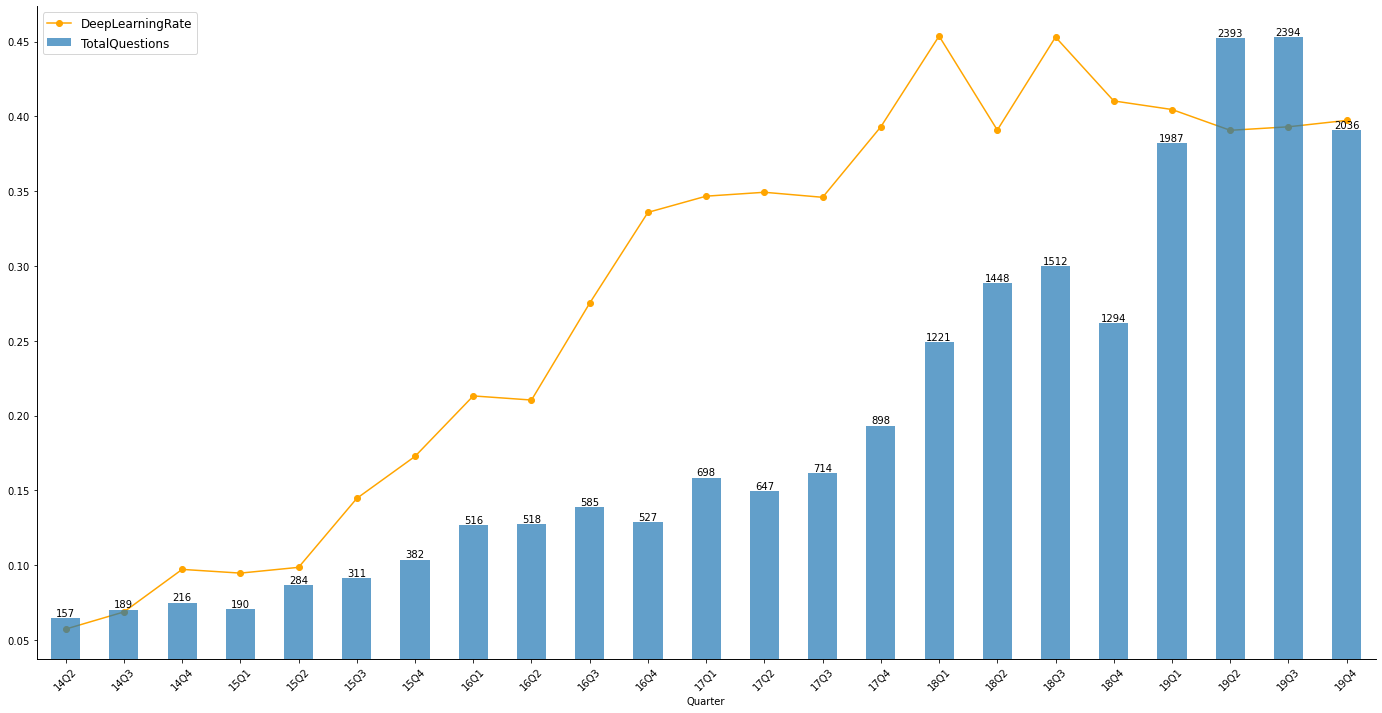

In [44]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in quarterly["TotalQuestions"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

It seems that deep learning questions was a high-growth trend since the start of DSSE and it looks like it is plateauing. There is no evidence to suggest that interest in deep learning is decreasing and so we maintain our previous idea of proposing that we create deep learning content.